In [181]:
import os
import numpy as np
import matplotlib.pyplot as plt
from DSH import SharedFunctions as sf
import logging 

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.WARNING)
logging.info('Analysis started')

INFO:root:Analysis started


In [235]:
froot = r'D:\Data\Chiara\250506_newRheo_Sample2'
h, S = np.loadtxt(os.path.join(froot, 'S(h).txt'), unpack=True)
px_size=0.0274 #mm/px
S_mm2 = S*px_size*px_size
h_mm = h/2
gap = 0.7
hcorr = h_mm - h_mm[0] + gap

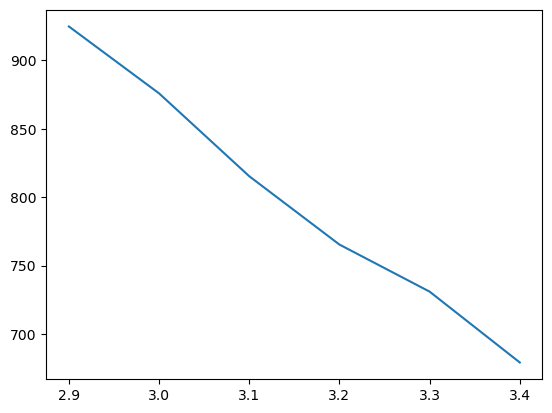

In [236]:
plt.plot(h, S_mm2)

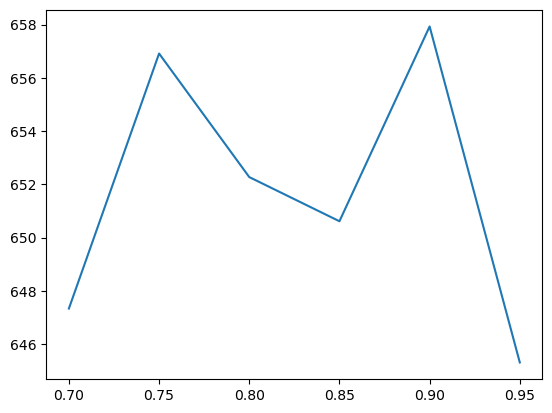

In [237]:
plt.plot(hcorr, S_mm2*hcorr)

In [238]:
S_mm2[0]

924.7666482400001

Flow curve

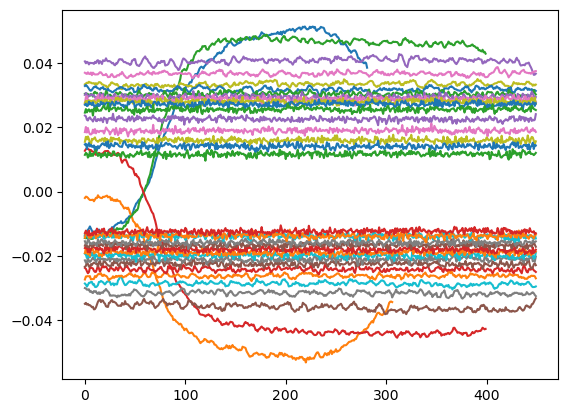

In [239]:
flow_subf = os.path.join(froot, '01_FlowCurve')
flow_namelist = sf.FindFileNames(flow_subf, Prefix='01_Flow')
avs_list = []
for f in flow_namelist:
    s_list = np.loadtxt(os.path.join(flow_subf, f), usecols=(6))
    plt.plot(s_list[-500:-50])
    avs_list.append(np.mean(s_list[-500:-50]))

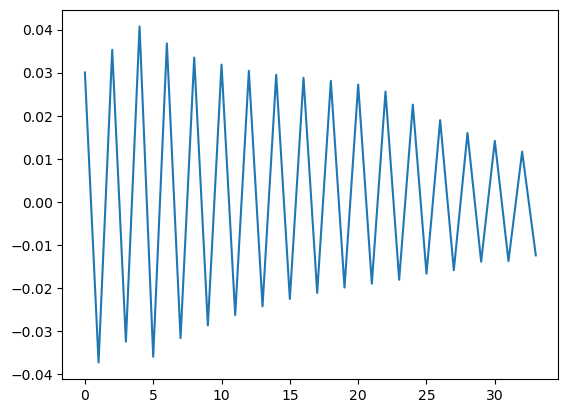

In [240]:
plt.plot(avs_list)

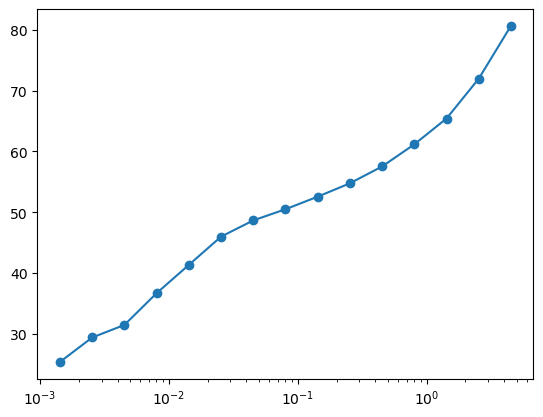

In [241]:
sdiff = []
srate = np.geomspace(0.001, 3.16228, 15, endpoint=True)/gap
for i in range(4, len(avs_list), 2):
    sdiff.append(0.5*(avs_list[i]-avs_list[i+1])/9.5e-4*2)

fig, ax = plt.subplots()
ax.plot(srate[::-1], sdiff, 'o-')
ax.set_xscale('log')

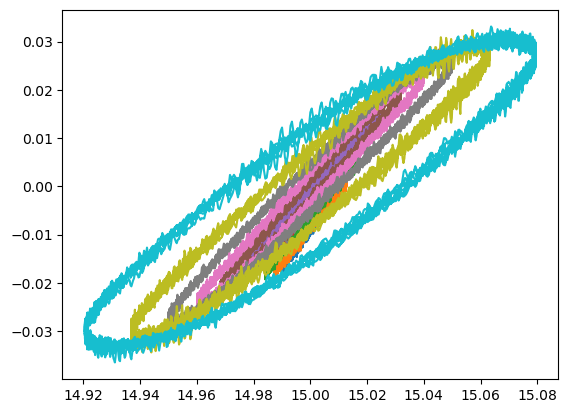

In [200]:
dss_subf = os.path.join(froot, '02_StrainStressSweep')
flow_namelist = sf.FindFileNames(dss_subf, Prefix='02_StrainSweep_AX0')
avs_list = []
for f in flow_namelist[:10]:
    curg, curs = np.loadtxt(os.path.join(dss_subf, f), usecols=(2,6), unpack=True)
    plt.plot(curg[1000:-100], -curs[1000:-100])

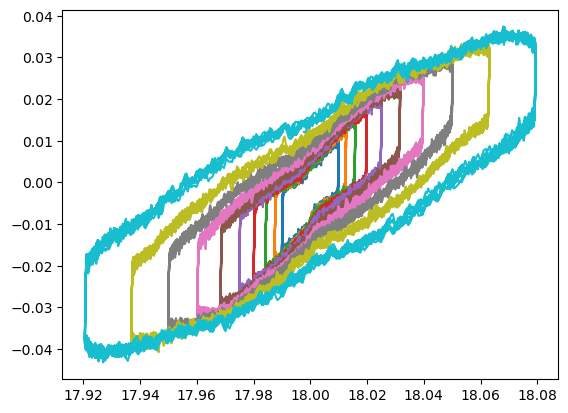

In [199]:
dss_subf = os.path.join(froot, '02_StrainStressSweep')
flow_namelist = sf.FindFileNames(dss_subf, Prefix='03_StrainSweep_AX1')
avs_list = []
for f in flow_namelist[:10]:
    curg, curs = np.loadtxt(os.path.join(dss_subf, f), usecols=(5,6), unpack=True)
    plt.plot(curg[1000:-100], -curs[1000:-100])

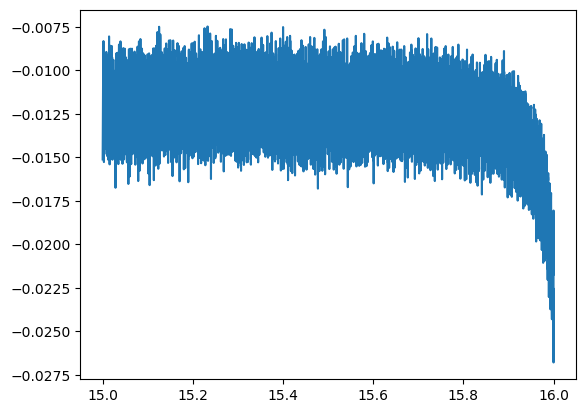

In [215]:
osr_subf = os.path.join(froot, '04_OSR')
x0, x1, f1 = np.loadtxt(os.path.join(osr_subf, '05_OSR_0.003_amp0.01_NEG.txt'), usecols=(2,5,6), unpack=True)
plt.plot(x0[10:], f1[10:])

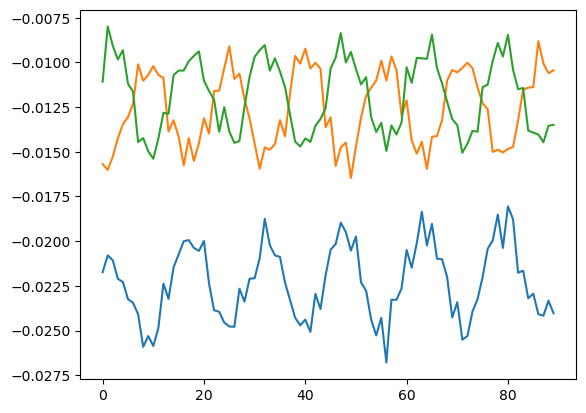

In [216]:
plt.plot(f1[10:100])
plt.plot(f1[1010:1100])
plt.plot(f1[4010:4100])

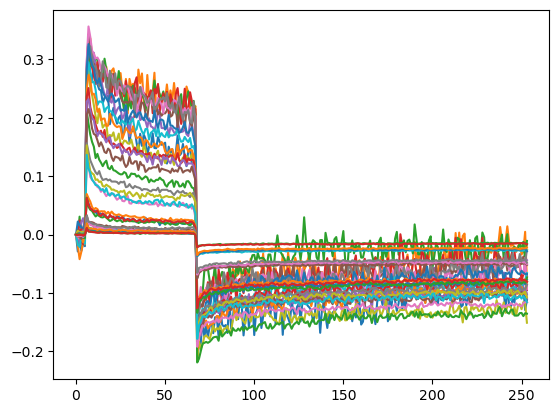

In [233]:
stepamp = [0.01, 0.0158489, 0.0251189, 0.0398107, 0.0630957, 0.1, 0.158489, 0.251189, 0.398107]
step_subf = os.path.join(froot, '06_Step')
step_namelist = sf.FindFileNames(step_subf, Prefix='0')
avgN = 20
for j in range(len(step_namelist)):
    curs = np.loadtxt(os.path.join(step_subf, step_namelist[j]), usecols=(6))
    cur_smean = np.asarray([np.mean(curs[i:i+avgN]) for i in range(0, len(curs), avgN)])
    sidx = int(np.floor(j/4))
    if j%2==0:
        plt.plot((cur_smean-cur_smean[0])/stepamp[sidx])
    else:
        plt.plot((cur_smean[0]-cur_smean)/stepamp[sidx])